What does this do?

In [4]:
import numpy as np

def run_2_opt_algorithm(
    number_of_stops,
    distance_matrix,
    iterations,
    seed=None,
):

    internal_stops = list(range(1, number_of_stops))
    if seed is not None:
        np.random.seed(seed)
        np.random.shuffle(internal_stops)
    tour = [0] + internal_stops + [0]

    
    best_cost = sum(
        distance_matrix[current_stop, next_stop]
        for current_stop, next_stop in
        zip(tour[:-1], tour[1:])
        )

    
    for _ in range(iterations):

        two_indices = np.random.choice(range(1, number_of_stops), 2)
        i, j = sorted(two_indices)

        candidate_tour = tour[:i] + tour[i:j + 1][::-1] + tour[j + 1:]

        candidate_cost = sum(
            distance_matrix[current_stop, next_stop]
            for current_stop, next_stop in
            zip(candidate_tour[:-1], candidate_tour[1:])
            )

        if (candidate_cost) <= best_cost:
            best_cost = candidate_cost
            tour = candidate_tour

    return tour

In [14]:
numbers = (1, 2, 3, 4, 5,)
letters = "ABCDEF"

In [15]:
for number in numbers:
    print(number)

1
2
3
4
5


In [16]:
for letter in letters:
    print(letter)

A
B
C
D
E
F


In [18]:
for pair in zip(numbers, letters):
    print(pair)

(1, 'A')
(2, 'B')
(3, 'C')
(4, 'D')
(5, 'E')


In [19]:
tour = ("NeW York", "Cardiff", "Jos", "Roseau", "Windhoek")
tour[:-1]

('NeW York', 'Cardiff', 'Jos', 'Roseau')

In [20]:
tour[1:]

('Cardiff', 'Jos', 'Roseau', 'Windhoek')

In [22]:
for current_city, next_city in zip(tour[:-1], tour[1:]):
    print(f"From {current_city} to {next_city}")

From NeW York to Cardiff
From Cardiff to Jos
From Jos to Roseau
From Roseau to Windhoek


In [5]:
x = np.array([13, 16, 22,  1,  4, 28,  4,  8, 10, 20, 22, 19,  5, 24,  7, 25, 25, 13, 27,  2,  7,  8, 24, 15, 25])
y = np.array([18,  6, 26, 14,  9, 10, 21, 20, 17, 20,  6, 16, 16,  1, 19,  4, 25, 18, 20, 20, 20, 15,  8,  1,  2])

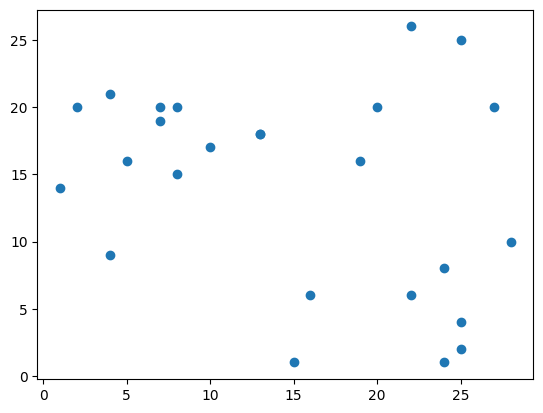

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [7]:
import sklearn.metrics.pairwise
distance_matrix = sklearn.metrics.pairwise.euclidean_distances(tuple(zip(x, y)))
distance_matrix

array([[ 0.        , 12.36931688, 12.04159458, 12.64911064, 12.72792206,
        17.        ,  9.48683298,  5.38516481,  3.16227766,  7.28010989,
        15.        ,  6.32455532,  8.24621125, 20.24845673,  6.08276253,
        18.43908891, 13.89244399,  0.        , 14.14213562, 11.18033989,
         6.32455532,  5.83095189, 14.86606875, 17.11724277, 20.        ],
       [12.36931688,  0.        , 20.88061302, 17.        , 12.36931688,
        12.64911064, 19.20937271, 16.1245155 , 12.52996409, 14.56021978,
         6.        , 10.44030651, 14.86606875,  9.43398113, 15.8113883 ,
         9.21954446, 21.02379604, 12.36931688, 17.80449381, 19.79898987,
        16.64331698, 12.04159458,  8.24621125,  5.09901951,  9.8488578 ],
       [12.04159458, 20.88061302,  0.        , 24.18677324, 24.75883681,
        17.08800749, 18.68154169, 15.23154621, 15.        ,  6.32455532,
        20.        , 10.44030651, 19.72308292, 25.07987241, 16.55294536,
        22.20360331,  3.16227766, 12.04159458,  7

In [28]:
tour = run_2_opt_algorithm(number_of_stops=25, distance_matrix=distance_matrix, iterations=10_000, seed=0)
tour

[0,
 9,
 2,
 16,
 18,
 5,
 22,
 15,
 24,
 13,
 10,
 11,
 1,
 23,
 4,
 3,
 19,
 6,
 12,
 21,
 14,
 20,
 7,
 8,
 17,
 0]

In [29]:
def plot_tour(x, y, tour):
    ordered_x = x[tour]
    ordered_y = y[tour]
    plt.figure()
    plt.scatter(x, y)
    plt.plot(ordered_x, ordered_y)

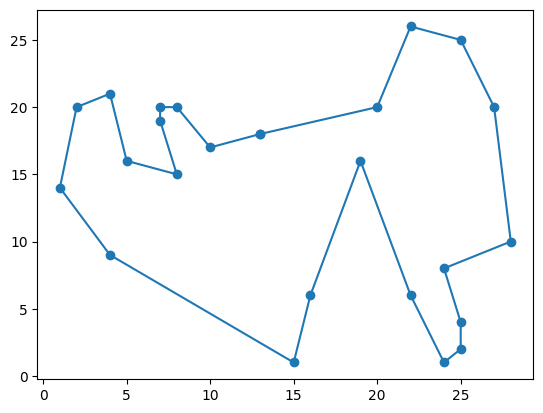

In [30]:
plot_tour(x=x, y=y, tour=tour)

In [31]:
def get_tour(number_of_stops, seed=None):
    internal_stops = list(range(1, number_of_stops))
    if seed is not None:
        np.random.seed(seed)
        np.random.shuffle(internal_stops)
    return [0] + internal_stops + [0]


def swap_cities(tour, steps):
    i, j = sorted(steps)
    new_tour = tour[:i] + tour[i:j + 1][::-1] + tour[j + 1:]
    return new_tour


def get_cost(tour, distance_matrix):
    return sum(
            distance_matrix[current_stop, next_stop]
            for current_stop, next_stop in
            zip(tour[:-1], tour[1:])
    )

In [32]:
get_cost(tour=tour, distance_matrix=distance_matrix)

124.47972042596972

In [ ]:
def run_2_opt_algorithm(
    number_of_stops,
    distance_matrix,
    iterations,
    filename=None,
    seed=None,
):
    tour = get_tour(number_of_stops=number_of_stops, seed=seed)
    best_cost = get_cost(tour=tour, distance_matrix=distance_matrix)
    for _ in range(iterations):
        two_indices = np.random.choice(range(1, number_of_stops), 2)
        candidate_tour = swap_cities(tour=tour, steps=two_indices)
        if (cost:=get_cost(tour=candidate_tour, distance_matrix=distance_matrix)) <= best_cost:
            best_cost = cost
            tour = candidate_tour
    return tour

In [ ]:
tour = run_2_opt_algorithm(number_of_stops=25, distance_matrix=distance_matrix, iterations=500, seed=0)
tour